### 1. Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import svm

### 2. Loading Dataset

In [2]:
data=pd.read_csv('data.csv')

### 3. Pre-Processing

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# label encoding for classes
# Note that we could have used LabelEncoder() function here 
# M stands for malignant and B stands for benign
data['diagnosis'] = data['diagnosis'].replace({'M': 0, 'B': 1})


In [5]:
#checking for null values
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# dropping irrelevant columns which do not affect the results
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)

### 4. Preliminary Analysis

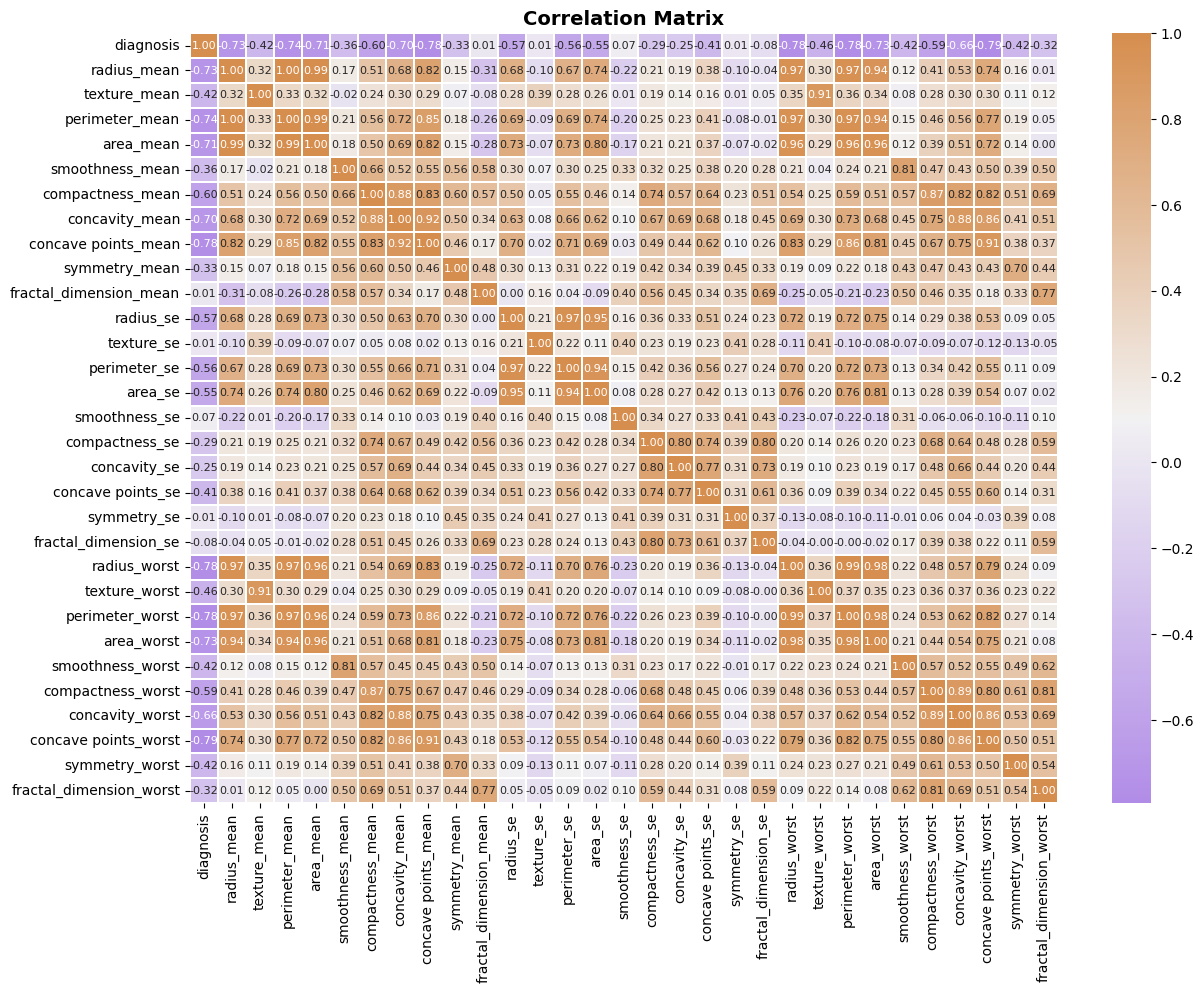

In [7]:
correlation_matrix = data.corr()

plt.figure(figsize=(14, 10))
cmap = sns.diverging_palette(1000, 400, l=65, center="light", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", annot_kws={'size': 8}, linewidths=.1)

plt.title("Correlation Matrix", fontsize=14, fontweight='bold')
plt.show()


In [8]:
#A group of highly correlated features will not bring additional information,
#but will increase the complexity of the algorithm

#Note-Implementation of this logic is not our individual creation but referred from online sources so we have commented this part out
# corr_matrix = data.corr().abs()

# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# print(to_drop)
# data.drop(to_drop, axis=1, inplace=True)



In [9]:
#Converting data for classification
x=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

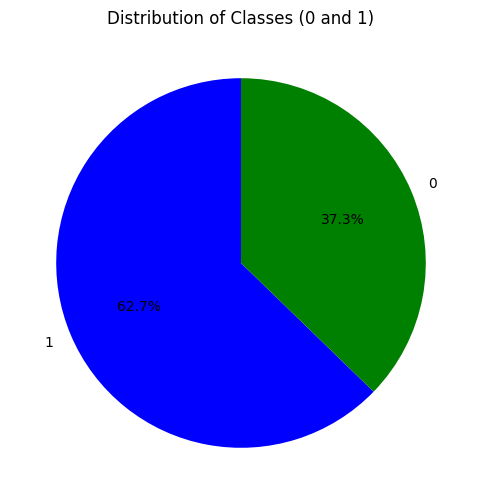

In [10]:
class_counts = y.value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['blue', 'green'], startangle=90)
plt.title('Distribution of Classes (0 and 1)')

# Show the plot
plt.show()

In [11]:
#we have fair amount of both classes-> no need fr synthetic minority class generation

In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [13]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### 5. Model Building

#### I) Neural Network

In [16]:
x_train.shape

(455, 30)

In [17]:
model = Sequential([
    Dense(30, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(30, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(15, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation="sigmoid"),
])

In [18]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
m=model.fit(x_train, y_train,batch_size = 32, validation_data=(x_test, y_test),epochs =50,callbacks = [early_stop])

Epoch 1/50
15/15 [==============================] - 2s 23ms/step - loss: 0.8792 - accuracy: 0.5297 - val_loss: 0.6081 - val_accuracy: 0.7982
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.7271 - accuracy: 0.5846 - val_loss: 0.5341 - val_accuracy: 0.9035
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.6118 - accuracy: 0.6308 - val_loss: 0.4741 - val_accuracy: 0.9211
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.6049 - accuracy: 0.6681 - val_loss: 0.4259 - val_accuracy: 0.9298
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.5302 - accuracy: 0.7385 - val_loss: 0.3804 - val_accuracy: 0.9298
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.5029 - accuracy: 0.7341 - val_loss: 0.3492 - val_accuracy: 0.9386
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.4734 - accuracy: 0.7780 - val_loss: 0.3224 - val_accuracy: 0.9386
Epoch 8/50
15/15 [=

<Axes: >

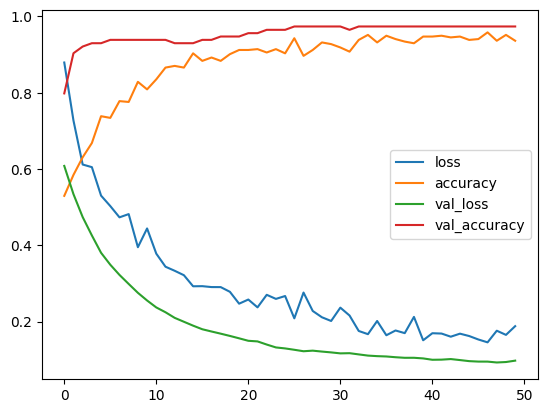

In [19]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [20]:
y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)

4/4 [==============================] - 0s 4ms/step


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        49
           1       0.96      1.00      0.98        65

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



score is: 0.9736842105263158


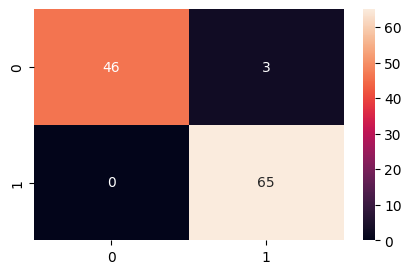

In [22]:
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print('score is:',score)
plt.figure(figsize=[5,3])
sns.heatmap(cm,annot=True)
plt.show()

#### II. Decision Tree

In [23]:
dt = DecisionTreeClassifier(max_depth = 6, max_features= 23)

In [24]:
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=6, max_features=23)

In [25]:
y_pred = dt.predict(x_test)

In [26]:
print (classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        49
           1       0.90      0.97      0.93        65

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [27]:
y_pred = dt.predict(x_test)
y_pred = (y_pred>0.5)

score is: 0.9210526315789473


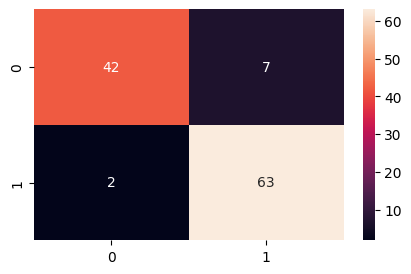

In [28]:
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print('score is:',score)
plt.figure(figsize=[5,3])
sns.heatmap(cm,annot=True)
plt.show()

#### III. Random Forest

In [29]:
rf = RandomForestClassifier(n_estimators = 5, max_depth = 6, max_features = 23)

In [30]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, max_features=23, n_estimators=5)

In [31]:
print (classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        49
           1       0.90      0.97      0.93        65

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [32]:
y_pred = rf.predict(x_test)
y_pred = (y_pred>0.5)

score is: 0.9649122807017544


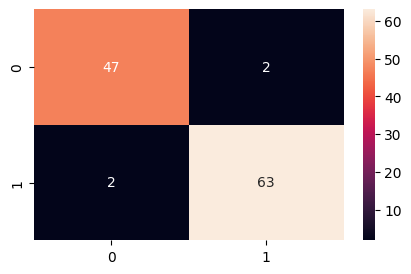

In [33]:
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print('score is:',score)
plt.figure(figsize=[5,3])
sns.heatmap(cm,annot=True)
plt.show()

#### IV. Logistic Regression

In [34]:
lr=LogisticRegression()

In [35]:
lr.fit(x_train, y_train)

LogisticRegression()

In [36]:
print (classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        49
           1       0.97      0.97      0.97        65

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [37]:
y_pred = lr.predict(x_test)
y_pred = (y_pred>0.5)

score is: 0.9736842105263158


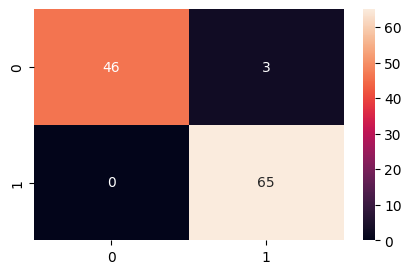

In [38]:
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print('score is:',score)
plt.figure(figsize=[5,3])
sns.heatmap(cm,annot=True)
plt.show()

#### V. XGBoost

In [39]:
xg = xgb.XGBClassifier(
    objective='binary:logistic',
    max_depth=3,                  
    learning_rate=0.1,            
    n_estimators=100               
)

In [40]:
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
y_pred = xg.predict(x_test)
y_pred = (y_pred>0.5)

score is: 0.9649122807017544


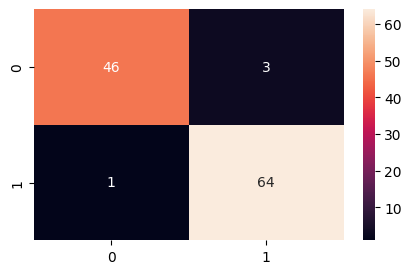

In [42]:
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print('score is:',score)
plt.figure(figsize=[5,3])
sns.heatmap(cm,annot=True)
plt.show()

#### VI. Support Vector Machine

In [43]:
sv = svm.SVC(kernel='linear', C=1)

In [44]:
sv.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [45]:
y_pred = sv.predict(x_test)
y_pred = (y_pred>0.5)

score is: 0.9649122807017544


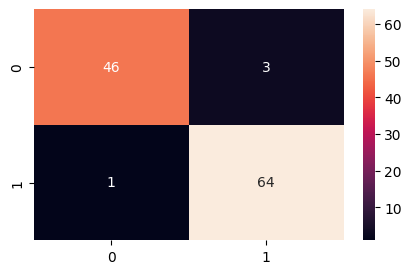

In [46]:
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print('score is:',score)
plt.figure(figsize=[5,3])
sns.heatmap(cm,annot=True)
plt.show()